In [1]:
import pandas as pd
# 读取归一化后的数据 （二选一）
# data = pd.read_csv("Min-Max归一化.csv")
data = pd.read_csv("Z-Score标准化.csv")
data.head()

,Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp,Prcp_lag_1,...,Tmax_lag_6,Srad_lag_6,Discharge_lag_6,Prcp_lag_7,Tmax_lag_7,Srad_lag_7,Discharge_lag_7,Year,Month,Day
0,2000-01-08,49.0,-1.375809,-0.269642,-1.184460,NaN,-0.992849,-0.729902,-0.836319,-0.507515,...,-0.501052,-0.781345,-0.532577,-0.508870,-0.997933,-0.857839,-0.531815,-1.421237,-1.61127,-0.885057
1,2000-01-09,46.0,-1.375809,-0.507515,-1.134343,NaN,-1.058464,-0.751663,-0.847891,-0.269642,...,-0.075040,-1.073961,-0.487535,-0.508870,-0.501400,-0.781438,-0.531815,-1.421237,-1.61127,-0.771299
2,2000-01-10,83.0,-1.331552,-0.507515,-1.269985,NaN,-0.760459,-0.350065,-0.583796,-0.507515,...,-0.078697,-1.324472,-0.190256,-0.162309,-0.075277,-1.074070,-0.486761,-1.421237,-1.61127,-0.657542
3,2000-01-11,120.0,-1.331552,1.941103,-1.862290,NaN,-0.700312,-0.016719,-0.321015,-0.507515,...,-0.061327,-0.978066,-0.064138,0.643647,-0.078935,-1.324593,-0.189405,-1.421237,-1.61127,-0.543785
4,2000-01-12,79.0,-1.331552,-0.347589,-1.359452,NaN,-0.762282,-0.338195,-0.575617,1.941103,...,-1.386900,-0.832023,-0.388442,1.362291,-0.061561,-0.978170,-0.063254,-1.421237,-1.61127,-0.430027


In [2]:
# 划分特征和目标变量
y = data['Discharge']
X=data[['Prcp','Discharge_lag_1','Discharge_lag_2','Discharge_lag_3','Discharge_lag_4','Discharge_lag_5']]
# 划分数据集
train_years = 1461  # 前4年的数据
X_train, X_test = X[:train_years], X[train_years:]
y_train, y_test = y[:train_years], y[train_years:]

In [3]:
print(y_train.head())
print("------------------------------")
print(y_test.head())

0     49.0
1     46.0
2     83.0
3    120.0
4     79.0
Name: Discharge, dtype: float64
------------------------------
1461    103.0
1462     80.0
1463     74.0
1464     76.0
1465     84.0
Name: Discharge, dtype: float64


In [4]:
from sklearn.ensemble import RandomForestRegressor

# 使用随机森林模型进行特征选择
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 特征选择
feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])
sorted_features = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_features)

Feature Importance:
                 Importance
Discharge_lag_1    0.758974
Prcp               0.139930
Discharge_lag_5    0.027007
Discharge_lag_2    0.024751
Discharge_lag_3    0.024690
Discharge_lag_4    0.024648


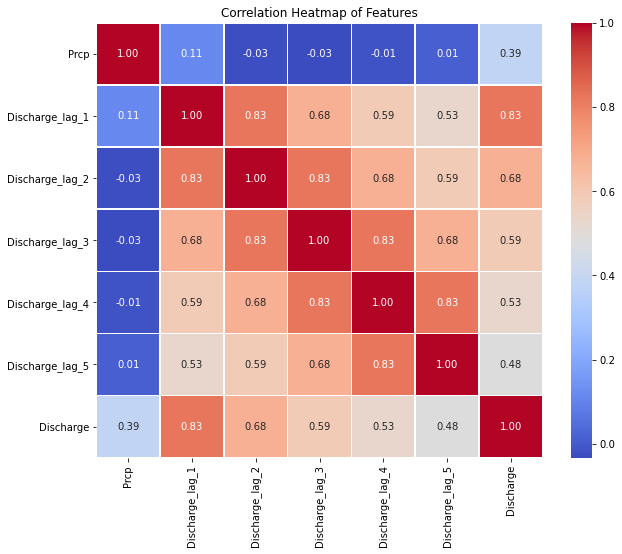

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用相关系数进行特征选择
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [5]:
# 使用相关系数进行特征选择
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features")
plt.show()

NameError: name 'plt' is not defined